<a href="https://colab.research.google.com/github/x3gan/elte-msc/blob/main/Deep%20Network%20Development/Numpy_Introduction_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NumPy Introduction**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Introduction</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://i.ibb.co/5gGPWvmw/1706863582925-1.png" alt="1706863582925-1" border="0">

Numpy is one of Python's most important packages: it allows for quick numerical computations. The default interpreter/compiler of Python is CPython. This implementation, compared to other languages, results in largely slower programs. The reasons for this lie in Python a being dynamically typed language, its automatic memory allocation, and CPython working almost entirely as an interpreter, which leaves very few options for optimizing code.

The speed difference truly shows when many Python statements need to be run, for example, while doing a matrix multiplication by using loops and multiplying the scalars together. This is exactly why Numpy contains functions that are capable of performing the same operation vectorized, many times over, without needing to use a Python loop. Numpy functions call code that was written in more efficient languages (such as C, Fortran), so much higher efficiency is possible by using Numpy than by using a native Python implementation.


In [ ]:
# @title Roadmap Generator for NumPy Introduction
%%capture flowchart_output
from graphviz import Digraph

def create_numpy_intro_flowchart(output_filename='numpy_introduction_flowchart'):
    dot = Digraph(name='NumpyIntroduction', format='png')
    dot.attr(rankdir='LR')  # Left-to-right layout
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    # Create nodes with topic and difficulty (new line before the difficulty)
    dot.node('Basics', 'ndarray Basics & Creation\n(Easy)', fillcolor='#A0E7A0')
    dot.node('Reshape', 'Reshaping & Views\n(Moderate)', fillcolor='#F6D49A')
    dot.node('Indexing', 'Indexing & Broadcasting\n(Moderate)', fillcolor='#F6D49A')
    dot.node('LinAlg', 'Linear Algebra Operations\n(Moderate)', fillcolor='#F6D49A')
    dot.node('Manipulation', 'Array Manipulation\n(Moderate)', fillcolor='#F6D49A')

    # Define the sequential flow between nodes
    dot.edge('Basics', 'Reshape')
    dot.edge('Reshape', 'Indexing')
    dot.edge('Indexing', 'LinAlg')
    dot.edge('LinAlg', 'Manipulation')

    dot.render(output_filename, view=False)

create_numpy_intro_flowchart('numpy_introduction_flowchart')


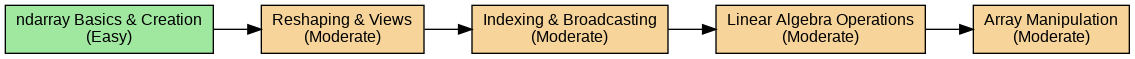

In [ ]:
from IPython.display import Image as IMG
IMG('numpy_introduction_flowchart.png')

## **Numpy basics - the `ndarray` type**

 The most important type in the package, the `ndarray` is an n-dimensional array implementation. Let's create a 2 dimensional, 2x3 size array containing integers. The dimensions of an array are not to be confused with the mathematical dimensions of a vector.

In [ ]:
import numpy as np  # import numpy package using the 'np' alias

a = np.array([[2,3,4],[1,5,8]], dtype=np.int32)   # create array
b = np.array([[3,2,9],[2,6,5]], dtype=np.int32)   # create array

print("The 'a' array:\n", a)
print("The 'b' array:\n", b)
print("Sum of the two arrays, elementwise:\n", a + b)
print("Multiplying all elements of 'a' by 2:\n", 2*a)
print("Adding up all elements of array 'a'. The sum is:", np.sum(a))

The 'a' array:
 [[2 3 4]
 [1 5 8]]
The 'b' array:
 [[3 2 9]
 [2 6 5]]
Sum of the two arrays, elementwise:
 [[ 5  5 13]
 [ 3 11 13]]
Multiplying all elements of 'a' by 2:
 [[ 4  6  8]
 [ 2 10 16]]
Adding up all elements of array 'a'. The sum is: 23


As you can see, it's possible to perform the same operation on the entire array (or a slice of it) without needing to write any loops in our code.

The `ndarray` array is represented of course as a sequence of bytes in the memory, so it is stored as a 1-dimensional vector. Once we created such an array, the number of elements cannot change, so if we wish to raise the size, we must create a new array. However, the shape of the array can change: an array with 6 elements can take up a 2x3, 3x2, 6, 6x1, 6x1x1, 1x3x1x1x2x1, etc. shape as well. In this case, the place of the elements in memory remains unchanged. The possibility of seeing the array in 6 dimensions and index it as such is provided by special iterators of the `ndarray` type. For example, a 1x3x1x1x2x1 shaped array can be indexed as: `my_array[0,2,0,0,1,0]`. The array's implementation can resolve this indexing by knowing how many steps must be taken in the memory to take a step along each axis (`ndarray.strides`).

Let's look at the `ndarray` type's attributes:

In [ ]:
a = np.array([[2,3,4,5],[1,5,8,9],[1,5,8,9]], dtype=np.int32)

print("The shape of the array:", a.shape)   # returning with a tuple
print("The data type of the array:", a.dtype)   # the type of the elements
print("The number of axes (dimensions of the array):", a.ndim)   # a.k.a length of the shape tuple
print("The size of the array (total number of elements):", a.size)   # the product of the shape
print("Length along the first axis:", a.shape[0])
print("Length along the first axis:", len(a))   # len() built-in python function

print("The strides of the array", a.strides)  # tells us how many bytes do we need to move in
                                              #   the memory to increase index along each axis


The shape of the array: (3, 4)
The data type of the array: int32
The number of axes (dimensions of the array): 2
The size of the array (total number of elements): 12
Length along the first axis: 3
Length along the first axis: 3
The strides of the array (16, 4)


## **Changing the shape of arrays**

As mentioned before, the shape of arrays can change freely, assuming that in the new shape the number of elements is unchanged. In this case, no copy of the original array gets made, instead, a new view is created over the old array. The type of this view is also `ndarray`, so it's seen as a simple array. It's important to understand that the view references the elements of the original array, so if the elements of the original array change, we will see these altered elements in the view as well. Also, if we change elements of the view, the original array changes too.

In [ ]:
a = np.arange(6, dtype=np.int32)
print("The 'a' array:\n", a)
print("   ... its shape is", a.shape)   # a tuple

b = a.reshape((2, 3)).copy()   # reshape to 2D shape: (2, 3)
print("\nThe 'a' array reshaped to 2D shape (2, 3):\n", b)
print("   ... its shape is", b.shape)

# We modify an item in the original array
a[0] = 42
print("\nThe modified 'a' array:\n", a)
print("The 2D 'b' view of the 'a' array is also modified:\n", b)

# Now we modify an item in the view array
b[1,1] = 99
print("\nThe content of the 'a' array after 2nd modification:\n", a)
print("The 'b' view after 2nd modification:", b)


The 'a' array:
 [0 1 2 3 4 5]
   ... its shape is (6,)

The 'a' array reshaped to 2D shape (2, 3):
 [[0 1 2]
 [3 4 5]]
   ... its shape is (2, 3)

The modified 'a' array:
 [42  1  2  3  4  5]
The 2D 'b' view of the 'a' array is also modified:
 [[0 1 2]
 [3 4 5]]

The content of the 'a' array after 2nd modification:
 [42  1  2  3  4  5]
The 'b' view after 2nd modification: [[ 0  1  2]
 [ 3 99  5]]


Since the number of elements in the array is fixed, while reshaping it we can set the length of an axis to -1, which calculates the correct length automatically.

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((3, 2))    # ndarray.reshape()
print("The 'a' array:\n", a)
print("   ... its shape is", a.shape)

b = a.reshape(-1)   # reshape to 1D
print("\nThe 'b' array:\n", b)
print("   ... its shape is", b.shape)

c = b.reshape((1,-1,3,1))   # reshape to 4D: (1,2,3,1)
print("\nThe 'c' array:\n", c)
print("   ... its shape is", c.shape)

d = np.reshape(a, (-1,))   # np.reshape() works similarly to ndarray.reshape()
print("\nThe 'd' array:\n", d)
print("   ... its shape is", d.shape)


The 'a' array:
 [[0 1]
 [2 3]
 [4 5]]
   ... its shape is (3, 2)

The 'b' array:
 [0 1 2 3 4 5]
   ... its shape is (6,)

The 'c' array:
 [[[[0]
   [1]
   [2]]

  [[3]
   [4]
   [5]]]]
   ... its shape is (1, 2, 3, 1)

The 'd' array:
 [0 1 2 3 4 5]
   ... its shape is (6,)


The order of the array's axes can be switched up as well (`np.swapaxes()`, `np.transpose()`, `ndarray.T`). These operations are the ones that should be used for transposing matrices as well.

## **Creating arrays**

The type of the elements inside the `ndarray` array must be given at its creation. Every element in the array will have the same type, with the exception of rarely used structured arrays and recarrays, but we won't be using those.

Documentation:
https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html

In [ ]:
a = np.zeros((2,3), dtype=np.float32)
print("New floating point array, filled with zeros:\n", a)

b = np.ones((2,2), dtype=np.int32)
print("New integer array, filled with ones:\n", b)

c = np.empty((1,3), dtype=np.float32)  # NO INITIALIZATION of elements, values are undefined
print("New EMPTY (uninitialized) array (elements may have any starting value):\n", c)

d = np.array([[1.,.2,-2.8],[2.6,3.2,-.2]], dtype=np.float32)
print("New floating point array, elements are given explicitly:\n", d)
print("    ... it's shape is ", d.shape)

New floating point array, filled with zeros:
 [[0. 0. 0.]
 [0. 0. 0.]]
New integer array, filled with ones:
 [[1 1]
 [1 1]]
New EMPTY (uninitialized) array (elements may have any starting value):
 [[ 0.000000e+00  0.000000e+00 -5.630583e+20]]
New floating point array, elements are given explicitly:
 [[ 1.   0.2 -2.8]
 [ 2.6  3.2 -0.2]]
    ... it's shape is  (2, 3)


Main datatypes (`dtype`):
* `np.bool_`: Boolean datatype (True or False). True is represented by a 1 and False is represented by a 0.
* `np.int8, int16, int32, int64`: integer datatypes contained in 1, 2, 4, 8 bytes, I.e. int8's values are inside the [-128, 127] interval.
* `np.float16, float32, float64`: real number datatypes contained in 2, 4, 8 bytes. Graphics cards today are optimized for using the float32 (single precision) datatype.

**Creating arrays from equal step size sequences:**

In [ ]:
# ranges, interavals

a = np.arange(5, dtype=np.int64)   # end value is given
print("Array with elements from range(5): ", a)
print("    ... shape of the array is:", a.shape)

b = np.arange(5, 10, dtype=np.float16)   # start & end value is given
print("\nArray with elements from range(5, 10): ", b)

c = np.arange(10, -4, -2, dtype=np.float64)   # start, end & step value is given
print("\nArray with elements from range(10, 4, -2): ", c)

b2 = np.arange(10, 5, dtype=np.float16)   # start & end value is given
print("\nArray with elements from (empty) range(10, 5): ", b2)
print("    ... shape of the empty array is:", b2.shape)

d = np.linspace(10., 13., num=7, endpoint=False, dtype=np.float64)
print("\nArray with equally spaced numbers from interval:\n", d)


Array with elements from range(5):  [0 1 2 3 4]
    ... shape of the array is: (5,)

Array with elements from range(5, 10):  [5. 6. 7. 8. 9.]

Array with elements from range(10, 4, -2):  [10.  8.  6.  4.  2.  0. -2.]

Array with elements from (empty) range(10, 5):  []
    ... shape of the empty array is: (0,)

Array with equally spaced numbers from interval:
 [10.         10.42857143 10.85714286 11.28571429 11.71428571 12.14285714
 12.57142857]


**Generating random numbers:**

In [ ]:
# random numbers
r1 = np.random.rand(1, 4, 1)
print("(1,4,1) shaped array with random elements from [0,1) interval (uniform):\n ", r1)
print("    ... shape of the array:", r1.shape, "; datatype of the array:", r1.dtype)

r2 = np.random.randn(2)
print("\n(2,) shaped array with random elements from standard normal (Gaussian) distribution:\n ", r2)

r3 = np.random.randint(5, size=(2,5), dtype=np.uint16)
print("\n(2,5) shaped array with random integer elements from [0,4] interval (uniform):\n ", r3)


(1,4,1) shaped array with random elements from [0,1) interval (uniform):
  [[[0.44428035]
  [0.56448829]
  [0.43426523]
  [0.42845164]]]
    ... shape of the array: (1, 4, 1) ; datatype of the array: float64

(2,) shaped array with random elements from standard normal (Gaussian) distribution:
  [0.02795003 0.36478077]

(2,5) shaped array with random integer elements from [0,4] interval (uniform):
  [[0 3 1 3 4]
 [2 3 0 3 0]]


## **Conversion between datatypes**

Later we will need to be able to convert an array of a certain datatype into another datatype. This will create a new array.

Here's a common use case: images and videos are often stored in uint8 format (a pixel's brightness in each color channel is represented by a value between 0 and 255), but in neural networks, we like to use real numbers, because gradient and hidden representations are not necessarily integers, so we convert them to the float32 format.

During the conversion process, we must be aware of possible data loss that may result from loss of precision, or under/overflow.

In [ ]:
a = np.array([[2,3,125], [255, 0, 45]], dtype=np.uint8)
print("Data type of the 'a' array:", a.dtype)
print("The 'a' array:\n", a)

b = a.astype(np.float32)  # type conversion
print("\nData type of the 'b' array:", b.dtype)
print("The 'b' array:\n", b)


Data type of the 'a' array: uint8
The 'a' array:
 [[  2   3 125]
 [255   0  45]]

Data type of the 'b' array: float32
The 'b' array:
 [[  2.   3. 125.]
 [255.   0.  45.]]


## **Basic indexing, multiple views**

Multiple elements of a Numpy array can be indexed at once to perform the same operation on all of them without using any loops.

We differentiate two different methods of indexing: **basic** and **advanced indexing**.

**Basic indexing** manages elements of the array like using a range on a Python list, but along multiple dimensions at once. For example, if array `a` is a one-dimensional array with a minimum of 10 elements, `a[5:10:2]` references its elements with the index 5,7,9. `a[5:10:2]` itself is of the ndarray type and includes the aforementioned three elements. In **basic indexing**, which is very similar, the created array is only a _view_ of the original array, so if the original array's elements are changed, the view's elements will also change accordingly.

We will discuss **advanced indexing** in the next notebook.

**Accessing and printing an element:**

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((3, 2))
print("The 'a' array:\n", a)
print("   ... its shape is", a.shape)

print("\nAccessing a single element:", a[0,1], a[0][1])

a[0,1] = 42  # writing a single element in the array
print("\nThe 'a' array:\n", a)

The 'a' array:
 [[0 1]
 [2 3]
 [4 5]]
   ... its shape is (3, 2)

Accessing a single element: 1 1

The 'a' array:
 [[ 0 42]
 [ 2  3]
 [ 4  5]]


**Negative index (indexing from the back):**

In [ ]:
# indexing with negative numbers: -1: last, -2: last but one

print("\nAccessing a single element:", a[0,-1])
print("Accessing a single element:", a[-2,-1])


Accessing a single element: 42
Accessing a single element: 3


**Range indexing (the syntax similiar to Python lists):**

In [ ]:
a = np.arange(6, dtype=np.int32)
print("The 'a' array:\n", a)
print("   ... its shape is", a.shape)

print("\nA slice of array 'a':", a[2:4])  # syntax -> start:stop:step_size

print("Another slice of array 'a':", a[2:])   # from #2 till end

print("A third slice of array 'a':", a[:4])   # from start till #4 (exclusive)

print("\nEvery second item in array 'a':", a[::2])

print("Reversed 'a':", a[::-1])

print("Custom slice 'a':", a[4:0:-2])

The 'a' array:
 [0 1 2 3 4 5]
   ... its shape is (6,)

A slice of array 'a': [2 3]
Another slice of array 'a': [2 3 4 5]
A third slice of array 'a': [0 1 2 3]

Every second item in array 'a': [0 2 4]
Reversed 'a': [5 4 3 2 1 0]
Custom slice 'a': [4 2]


**Range indexing on multiple axes at the same time:**

In [ ]:
a = np.arange(30, dtype=np.int32).reshape((5,6))
print("The 2D 'a' array:\n", a)
print("   ... its shape is", a.shape)

print("\nSingle index along axis#0, entire range along#1: ", a[3,0:6])  # 4th row

print("... same as previous, last axis indexing omitted: ", a[3])  # 4th row

print("Single index along axis#0, custom range along#1: ", a[3,6:0:-2])

print("\nEntire range along axis#0, single index along#1: ", a[:,3])  # 4th column

print("... same as previous, all axes omitted except last one: ", a[..., 3])  # 4th row

print("\nCustom range along both axes:\n", a[::3,6:0:-2])

The 2D 'a' array:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]
   ... its shape is (5, 6)

Single index along axis#0, entire range along#1:  [18 19 20 21 22 23]
... same as previous, last axis indexing omitted:  [18 19 20 21 22 23]
Single index along axis#0, custom range along#1:  [23 21 19]

Entire range along axis#0, single index along#1:  [ 3  9 15 21 27]
... same as previous, all axes omitted except last one:  [ 3  9 15 21 27]

Custom range along both axes:
 [[ 5  3  1]
 [23 21 19]]


Empty range. It's possible for an array's size to be 0, in this case, its shape along at least one axis is 0.

In [ ]:
b = a[8:,:]
print("\nAn empty slice of 'a': ", b)  # no error if RANGE is out of bounds
print("   ... its shape is", b.shape)

# b = a[8,:]   # would result in an error, because axis#0 SINGLE index is out of bounds


An empty slice of 'a':  []
   ... its shape is (0, 6)


**Printing slices of arrays:**

In [ ]:
a = np.arange(12, dtype=np.int32).reshape((4,3))
print("The 2D 'a' array:\n", a)
print("   ... its shape is", a.shape)

a[::2,1:3] = 42
print("\nThe modified 2D 'a' array:\n", a)

b = a[:,:2]   # 'b' is a view of array 'a', if we write 'b', we also write 'a'
print("\nThe 'b' array (a view of 'a'):\n", b)
print("   ... its shape is", b.shape)

b[:] = 99   # with [:] (or [:,:], ...) we refer to all elements in 'b'
print("\nThe 'b' array (a view of 'a'):\n", b)
print("\nThe 'a' array:\n", a)


The 2D 'a' array:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
   ... its shape is (4, 3)

The modified 2D 'a' array:
 [[ 0 42 42]
 [ 3  4  5]
 [ 6 42 42]
 [ 9 10 11]]

The 'b' array (a view of 'a'):
 [[ 0 42]
 [ 3  4]
 [ 6 42]
 [ 9 10]]
   ... its shape is (4, 2)

The 'b' array (a view of 'a'):
 [[99 99]
 [99 99]
 [99 99]
 [99 99]]

The 'a' array:
 [[99 99 42]
 [99 99  5]
 [99 99 42]
 [99 99 11]]


## **Simple arithmetic operations, treating arrays of different shapes (broadcasting)**

Arithmetics performed element-to-element (elementwise) on same-size arrays. Adding the elements of two arrays is done as shown below. No need for python loops.

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((2,3))
print("The 2D 'a' array:\n", a)
print("   ... its shape is", a.shape)

b = np.ones_like(a, dtype=np.int32)
print("\nThe 2D 'b' array:\n", b)
print("   ... its shape is", b.shape)

# now we add the two arrays

c = a+b
print("\nThe result array:\n", c)

The 2D 'a' array:
 [[0 1 2]
 [3 4 5]]
   ... its shape is (2, 3)

The 2D 'b' array:
 [[1 1 1]
 [1 1 1]]
   ... its shape is (2, 3)

The result array:
 [[1 2 3]
 [4 5 6]]


In [ ]:
d = np.full_like(a, 5, dtype=np.int32)
print(d)

[[5 5 5]
 [5 5 5]]


So far all is clear, we can add same-size arrays, multiply them, etc. elementwise. However, Numpy makes it possible, under certain conditions, to perform elementwise operations on arrays of different sizes. To do this, Numpy automatically synchronizes the sizes of the arrays, repeating elements along certain axes if needed. This is **broadcasting**.

What exactly happens if we try to raise every element of an array by a constant?


In [ ]:
a = np.arange(6, dtype=np.int32).reshape((2,3))
print("The 2D 'a' array:\n", a)
print("   ... its shape is", a.shape)

a = a+1
print("\nThe modified 'a' array:\n", a)


The 2D 'a' array:
 [[0 1 2]
 [3 4 5]]
   ... its shape is (2, 3)

The modified 'a' array:
 [[1 2 3]
 [4 5 6]]


Numpy first packs the Python int type '1' literal into a (1,) shaped Numpy array with one element which is the 1. After which, as seen on the image, raises its size to a (2,3) shape by repeating the elements along both axes, so that it exactly matches the 'a' array's shape.

![Illustration of NumPy broadcasting. On the left, a 2x3 array with values ((0,1,2),(3,4,5)). In the middle, a scalar value 1, shown as a (1,) shaped array. The scalar is expanded into a 2x3 array ((1,1,1),(1,1,1)) to match the shape of the first array. Adding the arrays elementwise results in ((1,2,3),(4,5,6))](https://drive.google.com/uc?export=download&id=1O_R6m1Jmt2ffset2D7GtV73YRgW9yYvc)

In the case of broadcasting, the **extended size array is really just a view over the original array**, no additional memory space is allocated. There is no actual repeating of elements, instead, the same memory space is accessed repeatedly.

Let's look at other cases of broadcasting. We can think of a 2D array like a matrix. Let's add a vector to each row of this matrix!

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((2,3))
print("The 2D 'a' array:\n", a)
print("   ... its shape is", a.shape)

vec = np.arange(10,40,10, dtype=np.int32)
print("\nThe 1D 'vec' array:\n", vec)
print("   ... its shape is", vec.shape)

a = a+vec
print("\nThe modified 'a' array:\n", a)

The 2D 'a' array:
 [[0 1 2]
 [3 4 5]]
   ... its shape is (2, 3)

The 1D 'vec' array:
 [10 20 30]
   ... its shape is (3,)

The modified 'a' array:
 [[10 21 32]
 [13 24 35]]


In this case, the vector with the shape of (3,) gets a new axis: so (1,3) will be its new shape, then by repeating elements along the axis with index #0, it will have a shape of (2,3).

![Illustration of NumPy broadcasting with a row vector. On the left, a 2x3 array ((0,1,2),(3,4,5)). On the right, a (3,) vector (10,20,30). The vector is reshaped to (1,3) and then broadcast along axis 0 to form a 2x3 array ((10,20,30),(10,20,30)). Adding elementwise gives the result ((10,21,32),(13,24,35)).](https://drive.google.com/uc?export=download&id=1hCbOpGPvU84B6Jg5fpBT866w49VYcamu)

Now let's try adding a column vector to the matrix!

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((2,3))
print("The 2D 'a' array:\n", a)
print("   ... its shape is", a.shape)

vec = np.arange(10,30,10, dtype=np.int32)
print("\nThe 1D 'vec' array:\n", vec)
print("   ... its shape is", vec.shape)

# a = a+vec    # ValueError: operands could not be broadcast together with shapes (2,3) (2,)

The 2D 'a' array:
 [[0 1 2]
 [3 4 5]]
   ... its shape is (2, 3)

The 1D 'vec' array:
 [10 20]
   ... its shape is (2,)


This would cause Numpy to throw an error, as it can't complete the operation. Why?

During broadcasting, Numpy tries comparing the length of each axis of the arrays moving backwards from the last dimension. In the last example, these were equal, however, this time the matrix's last axis with its length of three and the vector's length of 2 will not be compatible with each other.

![Illustration of a NumPy broadcasting error. On the left, a 2x3 matrix ((0,1,2),(3,4,5)). On the right, a (2,) vector (10,20). Since the last axis lengths differ (matrix has 3, vector has 2), broadcasting fails. A large red "X" indicates the error. The accompanying text explains that to fix this, the vector must be reshaped into (2,1), so that it aligns with the first axis of the matrix for successful broadcasting.](https://drive.google.com/uc?export=download&id=1ht8GtbplkKRQEQEcpFz4iCiJfg8bdCn8)

What can we do?

We need to let Numpy know that we want to compare the vector to the axis with index #0 from the matrix, instead of the axis with index #1. Because the axis comparison begins from the back, the vector must be manually made to be 2 dimensional, by the addition of an extra (length 1) last axis. So, we'll manually reshape the (2,) shaped vector into a (2, 1) shape and after that, perform the addition.

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((2,3))
print("The 2D 'a' array:\n", a)
print("   ... its shape is", a.shape)

vec = np.arange(10,30,10, dtype=np.int32)
print("\nThe 1D 'vec' array:\n", vec)
print("   ... its shape is", vec.shape)

a = a + vec.reshape((2, 1))
print("\nThe modified 'a' array:\n", a)

The 2D 'a' array:
 [[0 1 2]
 [3 4 5]]
   ... its shape is (2, 3)

The 1D 'vec' array:
 [10 20]
   ... its shape is (2,)

The modified 'a' array:
 [[10 11 12]
 [23 24 25]]


The operation was successful, the following happened: the (2,1) shaped vector that we made to be 2 dimensional repeated along axis #1 three times. This is of course just a view because actually, it's only the iteration over the vector that changed, so it still takes up 2 elements of space in memory.

![Illustration of successful NumPy broadcasting with a column vector. On the left, a 2x3 matrix ((0,1,2),(3,4,5)). Next to it, a reshaped (2,1) column vector ((10),(20)). A green check mark indicates success. The column vector is broadcast across three columns to form ((10,10,10),(20,20,20)). Adding elementwise produces ((10,11,12),(23,24,25)).](https://drive.google.com/uc?export=download&id=1G-cPJzXbpzXoHXUJwJ-lxk4LA8PsyI7d)

**We can create a multiplication table using broadcasting:**

In [ ]:
v1 = np.arange(3, dtype=np.int32)
print("The 'v1' vector:\n", v1)
print("   ... its shape is", v1.shape)

v2 = (np.arange(3, dtype=np.int32)+3).reshape(3,1)
print("The 'v2' vector:\n", v2)
print("   ... its shape is", v2.shape)

r = v1 * v2
print("\nThe result array:\n", r)

The 'v1' vector:
 [0 1 2]
   ... its shape is (3,)
The 'v2' vector:
 [[3]
 [4]
 [5]]
   ... its shape is (3, 1)

The result array:
 [[ 0  3  6]
 [ 0  4  8]
 [ 0  5 10]]


This time the shape of both arrays changed in order to match them together. The first, (3,) shaped vector got a new axis at index #0, so its dimensions match the second vector, making its shape (1,3). Now the first vector's 3 long axis is matched with the other vector's 1 length axis, while the second actor's 3 length axis is matched with the first vector's new axis by Numpy, so along both axes, the length of 1 is extended to a length of 3 by virtually repeating elements. So, in the end, two (3,3) shaped matrices will have their elements multiplied together in pairs, which will return the final result.

![Illustration of NumPy broadcasting with two vectors. On the left, a row vector (0,1,2) with shape (3,). On the right, a column vector ((3),(4),(5)) with shape (3,1). Each vector is broadcast to a 3x3 matrix: the row vector becomes ((0,1,2),(0,1,2),(0,1,2)) and the column vector becomes ((3,3,3),(4,4,4),(5,5,5)). Multiplying elementwise produces the final result matrix ((0,3,6),(0,4,8),(0,5,10)).](https://drive.google.com/uc?export=download&id=1LYRdTn-99cFHtCZD3teSNP8bK-zWFG8b)

**So what are the exact rules of broadcasting?**

- If the dimensions of two arrays do not match, the array with fewer dimensions gets new (length of 1) first axes. Just enough so that their dimensions match.
- Then the two arrays axes get paired and compared: the first array's axis with index #i has to have a length which is compatible with the second arrays #i axis. The two axes are compatible if their length is equal or either has a length of 1. If their length is equal, there is no need for repetition along the given axis. If their length is not equal and one of the arrays' axis has a length of 1, then along that array the entire array is repeated, enough times that the axis' length matches the length of the other array's axis.
- If two arrays are incompatible along any of the axes, then Numpy throws an error and the broadcasting cannot be performed.

Documentation: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

**The `None` index**

If we want to add a new (length 1) axis to the shape of the array, the `None` (or `np.newaxis`) index is something we can use.

In [ ]:
# the previous code block in a more compact way

r = np.arange(3, dtype=np.int32) * (np.arange(3, dtype=np.int32)+3)[:,None]
print("\nThe result array:\n", r)


The result array:
 [[ 0  3  6]
 [ 0  4  8]
 [ 0  5 10]]


**Some important element-by-element (elementwise) operation**

In [ ]:
a = np.arange(6, dtype=np.int32).reshape((2,3))
print("The 2D 'a' array:\n", a)
print("   ... its shape is", a.shape)

vec = np.array([2,4], dtype=np.int32)[:,None]
print("\nThe 'vec' array:\n", vec)
print("   ... its shape is", vec.shape)

#
print("\nAdding:\n", a+vec)
print("\nSubtracting:\n", a-vec)
print("\nMultiplying:\n", a*vec)
print("\nFloat division:\n", a/vec)   # this would be integer div in Python2 since both array are of int type!!!
print("\nInteger division:\n", a//vec)
print("\nPower:\n", a**vec)
print("\nModulo:\n", a%vec)
print("\nElementwise maximum:\n", np.maximum(a, vec))
print("\nEqual:\n", a == vec)
print("\nGreater:\n", a > vec)

The 2D 'a' array:
 [[0 1 2]
 [3 4 5]]
   ... its shape is (2, 3)

The 'vec' array:
 [[2]
 [4]]
   ... its shape is (2, 1)

Adding:
 [[2 3 4]
 [7 8 9]]

Subtracting:
 [[-2 -1  0]
 [-1  0  1]]

Multiplying:
 [[ 0  2  4]
 [12 16 20]]

Float division:
 [[0.   0.5  1.  ]
 [0.75 1.   1.25]]

Integer division:
 [[0 0 1]
 [0 1 1]]

Power:
 [[  0   1   4]
 [ 81 256 625]]

Modulo:
 [[0 1 0]
 [3 0 1]]

Elementwise maximum:
 [[2 2 2]
 [4 4 5]]

Equal:
 [[False False  True]
 [False  True False]]

Greater:
 [[False False False]
 [False False  True]]


**Elementwise operations on bool type arrays:**

In [ ]:
a = np.arange(10, dtype=np.int32).reshape((2,5))
b = (a % 3 == 0)    # True for elements divisible by 3
print("The 2D 'b' array:\n", b)
print("   ... its shape is", b.shape)
print("   ... its data type is", b.dtype)  # np.bool_

c = (a % 2 != 0)    # True for elements not divisible by 2 (odd numbers)
for i in range(2):
  for j in range(5):
    c[i,j] = a[i,j] % 2 != 0

print("\nThe 2D 'c' array:\n", c)
print("   ... its shape is", c.shape)
print("   ... its data type is", c.dtype)  # np.bool_

print("\nElementwise logical AND of the two arrays:\n", b & c)  # 'and' (1.2 and 1) => (True and True)
np.logical_and(b, c)
print("\nElementwise logical OR of the two arrays:\n", b | c)
print("\nElementwise logical NOT of array 'b':\n", ~b)

The 2D 'b' array:
 [[ True False False  True False]
 [False  True False False  True]]
   ... its shape is (2, 5)
   ... its data type is bool

The 2D 'c' array:
 [[False  True False  True False]
 [ True False  True False  True]]
   ... its shape is (2, 5)
   ... its data type is bool

Elementwise logical AND of the two arrays:
 [[False False False  True False]
 [False False False False  True]]

Elementwise logical OR of the two arrays:
 [[ True  True False  True False]
 [ True  True  True False  True]]

Elementwise logical NOT of array 'b':
 [[False  True  True False  True]
 [ True False  True  True False]]


### **HOMEWORK (Optional)**

- **Exercise 1: Array Creation**  
  Create a 1-dimensional numpy array from a Python list, a 2-dimensional array from a nested list, and a 3-dimensional array from a list of 2D arrays. Print the arrays along with their shapes.

- **Exercise 2: Array Indexing**  
  Given a 2D numpy array, use both positive and negative indexing to access and print specific elements (for example, the element at row 2, column 3, and the last element of the first row).

- **Exercise 3: Array Slicing**  
  Slice a 2D numpy array to extract a subarray. Experiment with different slicing parameters (start, stop, step) to extract rows, columns, or a block of elements from the array.

- **Exercise 4: Boolean Indexing**  
  Create a numpy array of integers and use a boolean condition to select and print all elements that are greater than a given threshold.

- **Exercise 5: Array Arithmetic**  
  Perform element-wise arithmetic operations on two numpy arrays of the same shape. For example, add, subtract, multiply, and divide them, and print the results. Also, explore using functions like `np.add` and `np.multiply`.

- **Exercise 6: Aggregation Functions**  
  Given a numpy array, calculate and print its sum, mean, median, minimum, and maximum. Additionally, use the `axis` parameter to compute these statistics along the rows and columns.

In [2]:
import numpy as np

**Exercise 1: Array Creation**<br>
Create a 1-dimensional numpy array from a Python list, a 2-dimensional array from a nested list, and a 3-dimensional array from a list of 2D arrays. Print the arrays along with their shapes.

In [8]:
a = np.array([1,2,3], dtype= np.int32)
print(a)
print(a.shape)

[1 2 3]
(3,)


In [9]:
b = np.array([[1,2,3],[4,5,6]], dtype= np.int32)
print(b)
print(b.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [10]:
c = np.array([[[1, 2, 3], [4, 5, 6]],[[7, 8, 9], [10, 11, 12]]], dtype= np.int32)
print(c)
print(c.shape)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
(2, 2, 3)


**Exercise 2: Array Indexing**<br>
Given a 2D numpy array, use both positive and negative indexing to access and print specific elements (for example, the element at row 2, column 3, and the last element of the first row).

In [11]:
a = np.arange(6, dtype= np.int32).reshape((2,3))
print(a)

[[0 1 2]
 [3 4 5]]


In [12]:
print(a[1,2])

5


In [13]:
print(a[0,-1])

2


**Exercise 3: Array Slicing**<br>
Slice a 2D numpy array to extract a subarray. Experiment with different slicing parameters (start, stop, step) to extract rows, columns, or a block of elements from the array.

In [32]:
print(a[0,1:3])

[1 2]


**Exercise 4: Boolean Indexing**<br>
Create a numpy array of integers and use a boolean condition to select and print all elements that are greater than a given threshold.

In [35]:
print(a > 3)

[[False False False]
 [False  True  True]]


**Exercise 5: Array Arithmetic**<br>
Perform element-wise arithmetic operations on two numpy arrays of the same shape. For example, add, subtract, multiply, and divide them, and print the results. Also, explore using functions like np.add and np.multiply.

In [37]:
b = np.array([1,2], dtype= np.int32).reshape(2,1)
print(b)

[[1]
 [2]]


In [38]:
a + b

array([[1, 2, 3],
       [5, 6, 7]], dtype=int32)

**Exercise 6: Aggregation Functions**<br>
Given a numpy array, calculate and print its sum, mean, median, minimum, and maximum. Additionally, use the axis parameter to compute these statistics along the rows and columns.

In [49]:
print(a)
print(np.sum(a, axis= 0))
print(np.mean(a))
print(np.median(a))
print(np.min(a))
print(np.max(a))

[[0 1 2]
 [3 4 5]]
[3 5 7]
2.5
2.5
0
5
